In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import io, draw
#B18DCPT119

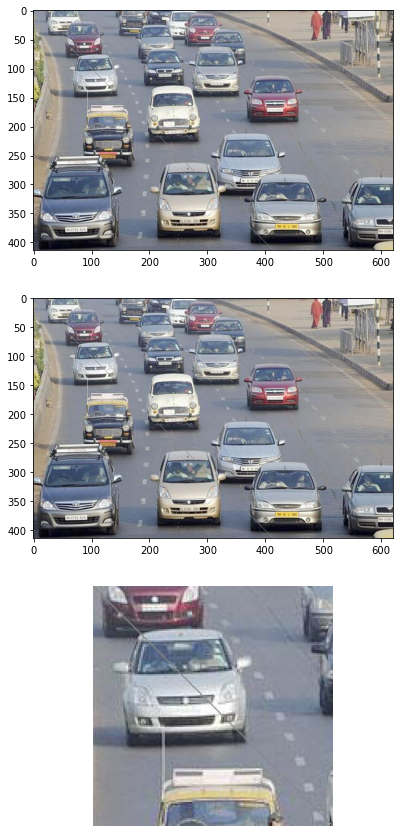

In [2]:
image = Image.open("data/car.jpg")
#io.imshow(np.asarray(image));

rgbValue = image.getpixel((50, 20))
width, height = image.size
image1 = image
for x in range(height):
    image1.putpixel( (x, x), rgbValue )
#io.imshow(np.asarray(image1))

crop_rectangle = (50, 50, 200, 200)
cropped_im = image.crop(crop_rectangle)

fig, ax = plt.subplots(3, 1, figsize=(15, 15))
ax[0].imshow(image); plt.axis('off');
ax[1].imshow(image1); plt.axis('off');
ax[2].imshow(cropped_im)

In [ ]:
im = cv2.imread('data/car.jpg')

b = im.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = im.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = im.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0

fig, ax = plt.subplots(3, 1, figsize=(15, 15))
ax[0].imshow(r); plt.axis('off');
ax[1].imshow(g); plt.axis('off');
ax[2].imshow(b)

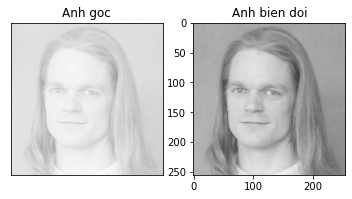

In [7]:
import matplotlib.pylab as pylab
from skimage import io, color, data
from PIL import Image, ImageFont, ImageDraw, ImageOps
import numpy as np
import matplotlib.pylab as plt

#doc va xu ly anh
img = Image.open("data/lc_im.png")

#chuyen ve anh xam
img_org = ImageOps.grayscale(img)

#chuyen anh sang mang de xu ly
I = np.asarray(img_org)

#bien doi ham mu
gamma_corrected = 255 * (I/255) ** 3;
#gamma_corrected = 255 * (I/255) ** 0.3;

#chuyen tu mang ve anh
im_gc = Image.fromarray(np.float64(gamma_corrected))
f, axe = plt.subplots(1, 2)
axe[0].set_title("Anh goc")
axe[0].imshow(img_org, cmap='gray', vmin=0, vmax=255)
axe[0].set_xticks([ ])
axe[0].set_yticks([ ])
axe[1].set_title("Anh bien doi")
axe[1].imshow(im_gc, cmap='gray', vmin=0, vmax=255)

Text(0.5, 1.0, 'sharpen')

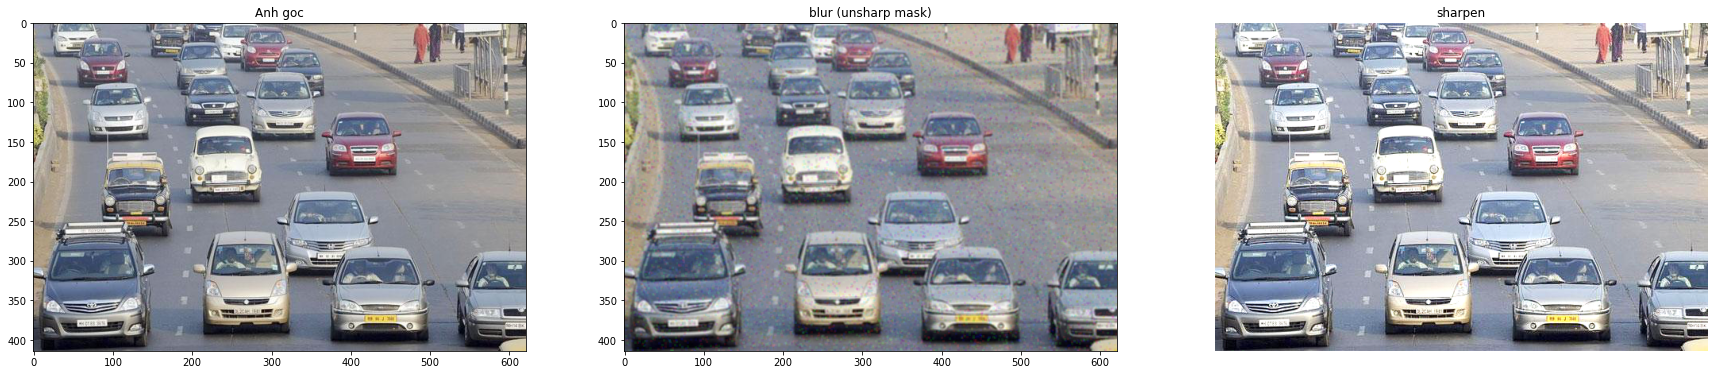

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.util import random_noise

#Them nhieu vao anh
img = cv2.imread("data/car.jpg")
#add salt and pepper noise
noise_img = random_noise(img, mode='s&p', amount=0.03)

noise_img = np.array(255*noise_img, dtype = 'uint8')

#Bo loc trung binh
kernel = 1/9 * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

#averaging for smooth
fimage = cv2.filter2D(noise_img, -1, kernel)

img_blur = cv2.medianBlur(noise_img, 3) #image, kernel size

#fimage
fimage1 = cv2.addWeighted(img, 1.7, img_blur, -0.5, 0)
fig, ax = plt.subplots(1, 3, figsize=(30,30))
ax[0].imshow(img[:,:,::-1]); plt.axis('off'); ax[0].set_title('Anh goc')
ax[1].imshow(fimage[:,:,::-1]); plt.axis('off'); ax[1].set_title('blur (unsharp mask)')
ax[2].imshow(fimage1[:,:,::-1]); plt.axis('off'); ax[2].set_title('sharpen')